<a href="https://colab.research.google.com/github/PaulToronto/Johns-Hopkins-Coursera-Applied-Calculus-With-Python/blob/main/3_1_Limits_and_Rates_of_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Limits and Rates of Change

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

## 3.1.1 Reading: Lists and Tuples in Python

### Lists

- a list is an **ordered** collection of objects
- lists are mutable
- can contain an unlimited number of objects of any type
- a list's **lenght** is the number of objects in the list
- the objects are indexed
    - zero-based indexing

In [2]:
my_list = [12, 'seven', -2.5]
len(my_list)

3

In [3]:
my_list[0]

12

In [4]:
number_list = [0, -1, 5, -2.7, 5.9, 0, 4.1]
max(number_list), min(number_list)

(5.9, -2.7)

### Tuples

- like a list, but **immutable**

In [5]:
my_tuple = (1, 2, 3)
type(my_tuple)

tuple

### Adding items to a list

In [6]:
my_list = [1, 2, 3]
my_list.append(4)
my_list

[1, 2, 3, 4]

In [7]:
my_list.append([0, 0, 0])
my_list

[1, 2, 3, 4, [0, 0, 0]]

In [8]:
my_list.extend([1, 1, 1])
my_list

[1, 2, 3, 4, [0, 0, 0], 1, 1, 1]

In [9]:
my_list.insert(2, 'index two')
my_list

[1, 2, 'index two', 3, 4, [0, 0, 0], 1, 1, 1]

### Removing items from a list

In [10]:
del my_list[2]
my_list

[1, 2, 3, 4, [0, 0, 0], 1, 1, 1]

In [11]:
my_list.remove(1)

In [12]:
my_list.remove(1)

In [13]:
my_list # when there are more than it removes only the first

[2, 3, 4, [0, 0, 0], 1, 1]

### List Comprehensions

`[expression for item in l if condition`

In [14]:
number_list = [0, -1, 5, -2.7, 5.9, 0, 4.1]
positive_number_list = [i for i in number_list if i > 0]
positive_number_list

[5, 5.9, 4.1]

### List Comprehension with SymPy

Suppose we want to find $f(x) = x^{2} + 2x + 1$ for all $x$ in our number list. 

In [15]:
number_list = [0, -1, 5, -2.7, 5.9, 0, 4.1]

In [16]:
x = sym.symbols('x')
f = x**2 + 2*x + 1
f

x**2 + 2*x + 1

In [17]:
[f.subs(x, i) for i in number_list]

[1, 0, 36, 2.89000000000000, 47.6100000000000, 1, 26.0100000000000]

## 3.1.2 Theory: Introduction to Limits

### Definition: Limit

We write $\lim_{x \to a} f(x) = L$ if we can make $f(x)$ as close to $L$ as we like by taking $x$ as close to $a$ (on either side) but not equal to $a$. 

### Example

$$
f(x) = x^{2}
$$

$$
\lim_{x \to 2} f(x) = 4
$$

In [18]:
f = x**2
f

x**2

In [19]:
f.subs(x, 2), f.limit(x, 2)

(4, 4)

### Example

In [20]:
x = sym.symbols('x')

f = sym.Piecewise((x**2 + 1, x > 0),
                  (x + 1, x < 0), 
                  (3, True))

In [21]:
print(sym.latex(f))

\begin{cases} x^{2} + 1 & \text{for}\: x > 0 \\x + 1 & \text{for}\: x < 0 \\3 & \text{otherwise} \end{cases}


$$
f(x) = \begin{cases} x^{2} + 1 & \text{for}\: x > 0 \\x + 1 & \text{for}\: x < 0 \\3 & \text{otherwise} \end{cases}
$$

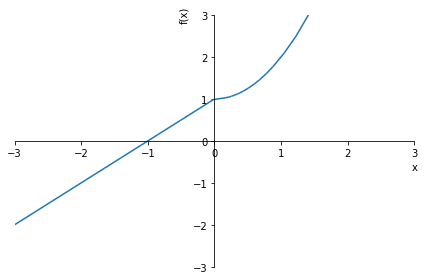

In [22]:
sym.plot(f, xlim=[-3, 3], ylim=[-3, 3]);

$$
f(0) = 3
$$

$$
\lim_{x \to 0} f(x) = 1
$$

In [23]:
f.subs(x, 0), f.subs(x, 0.0001), f.subs(x, -0.0001)

(3, 1.00000001000000, 0.999900000000000)

In [24]:
f.limit(x, 0)

1

We can see in the above example, that $f(a)$ need not be the same as $\lim_{x \to a} f(x)$. In fact, the function doesn't even need to be defined at $a$ for there to be a limit as $x \to a$.

### Example

$$
f(x) = \frac{\sin{x}}{x}
$$

$f(0)$ is undefined, but $\lim_{x \to 0} f(x) = 1$

In [25]:
f = sym.sin(x) / x
f

sin(x)/x

In [26]:
f.subs(x, 0), f.limit(x, 0)

(nan, 1)

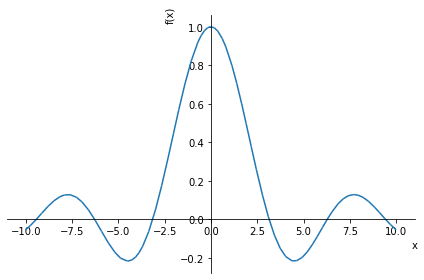

In [27]:
sym.plot(f);

### Finding limits using tables

$$
f(t) = \frac{\sqrt{t^{2} + 9} - 3}{t^{2}}
$$

What is $\lim_{t \to 0} f(t)$?

In [28]:
t = sym.symbols('t')

f = (sym.sqrt(t**2 + 9) - 3) / t**2
f

(sqrt(t**2 + 9) - 3)/t**2

In [29]:
x1 = [(1/n) for n in range(1, 100_000, 1000)]
y1 = [f.subs(t, a) for a in x1]

In [30]:
x2 = [(-1/n) for n in range(1, 100_000, 1000)]
y2 = [f.subs(t, a) for a in x2]

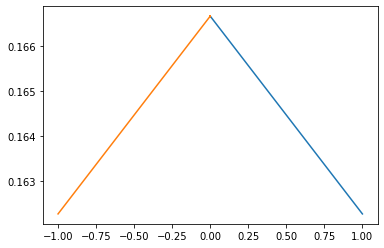

In [31]:
plt.plot(x1, y1)
plt.plot(x2, y2)

plt.show()

In [32]:
f

(sqrt(t**2 + 9) - 3)/t**2

In [33]:
f.subs(t, x1[-1]), f.subs(t, x2[-1]), f.limit(t, 0), f.limit(t, 0).evalf()

(0.166665646908500, 0.166665646908500, 1/6, 0.166666666666667)

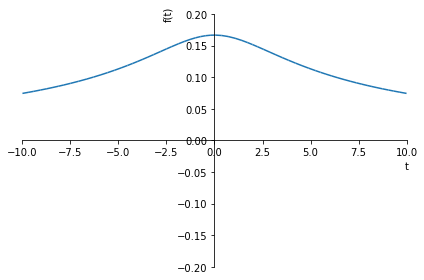

In [34]:
sym.plot(f, xlim=[-10, 10], ylim=[-.2, .2]);

### Example

$
f(x) = \sin{\frac{\pi}{x}}
$

$\lim_{x \to 0} f(x)$ does not exist. 

In [35]:
x = sym.symbols('x')

f = sym.sin(sym.pi/x)
f

sin(pi/x)

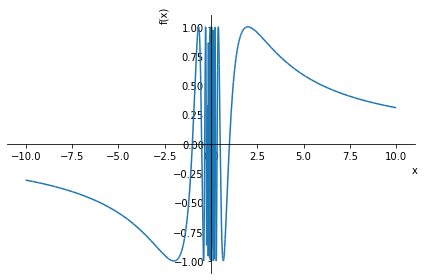

In [36]:
sym.plot(f);

In [37]:
f.subs(x, 0), f.limit(x, 0)

(nan, AccumBounds(-1, 1))

In [38]:
f.limit(x, 0, '-'), f.limit(x, 0, '+')

(AccumBounds(-1, 1), AccumBounds(-1, 1))

### Example: A constant function

$f(x) = 5$

$
\lim_{x \to 0} f(x) = 5
$

### Example

$
\begin{align}
\lim_{x \to 4} \left(x^{2} - 4\right) 
&= 4^2 - 4 \\
&= 16 - 4 \\
&= 12
\end{align}
$

In [39]:
x = sym.symbols('x')

f = x**2 - 4
f

x**2 - 4

In [40]:
f.limit(x, 4)

12

## 3.1.3 Reading: Limits and Rates of Change